## Import required libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('/home/vishal/Downloads/Traffic_sign_recognition')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

2022-06-15 23:32:16.375198: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/vishal/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-06-15 23:32:16.375235: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
pip install opencv-python


     |████████████████████████████████| 60.9 MB 1.8 MB/s eta 0:00:01    |████▊                           | 9.1 MB 310 kB/s eta 0:02:47
Note: you may need to restart the kernel to use updated packages.


## Store data, labels in the list

In [3]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [4]:
cur_path

'/home/vishal/Downloads/Traffic_sign_recognition'

## Preprocess the images

In [7]:
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/0\\00000_00000_00014.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/0\\00000_00000_00009.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/0\\00000_00004_00005.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/0\\00000_00006_00015.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/0\\00000_00002_00016.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/0\\00000_00005_00018.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/0\\00000_00001_00000.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/0\\00000_00004_00028.png'
[Errno 2] No such file or directory: '/home/vishal/Downl

[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/1\\00001_00024_00029.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/1\\00001_00015_00019.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/1\\00001_00041_00026.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/1\\00001_00052_00003.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/1\\00001_00011_00015.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/1\\00001_00007_00017.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/1\\00001_00025_00013.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/1\\00001_00040_00025.png'
[Errno 2] No such file or directory: '/home/vishal/Downl

[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/2\\00002_00002_00020.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/2\\00002_00060_00021.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/2\\00002_00009_00012.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/2\\00002_00026_00004.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/2\\00002_00031_00005.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/2\\00002_00054_00000.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/2\\00002_00063_00025.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/2\\00002_00011_00023.png'
[Errno 2] No such file or directory: '/home/vishal/Downl

[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/2\\00002_00030_00020.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/2\\00002_00047_00019.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/2\\00002_00008_00022.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/2\\00002_00000_00028.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/2\\00002_00028_00019.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/2\\00002_00050_00028.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/2\\00002_00009_00022.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/2\\00002_00047_00008.png'
[Errno 2] No such file or directory: '/home/vishal/Downl

[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/3\\00003_00007_00025.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/3\\00003_00013_00023.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/3\\00003_00045_00017.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/3\\00003_00002_00029.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/3\\00003_00011_00009.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/3\\00003_00025_00009.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/3\\00003_00018_00025.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/3\\00003_00002_00003.png'
[Errno 2] No such file or directory: '/home/vishal/Downl

[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/4\\00004_00005_00008.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/4\\00004_00035_00013.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/4\\00004_00061_00007.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/4\\00004_00058_00025.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/4\\00004_00027_00003.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/4\\00004_00041_00017.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/4\\00004_00051_00027.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/4\\00004_00054_00019.png'
[Errno 2] No such file or directory: '/home/vishal/Downl

[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/5\\00005_00011_00027.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/5\\00005_00027_00017.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/5\\00005_00049_00028.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/5\\00005_00055_00013.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/5\\00005_00054_00008.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/5\\00005_00002_00010.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/5\\00005_00006_00007.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/5\\00005_00057_00006.png'
[Errno 2] No such file or directory: '/home/vishal/Downl

[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/5\\00005_00012_00001.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/5\\00005_00035_00007.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/5\\00005_00031_00001.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/5\\00005_00057_00003.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/5\\00005_00028_00025.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/5\\00005_00038_00029.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/5\\00005_00003_00004.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/5\\00005_00056_00021.png'
[Errno 2] No such file or directory: '/home/vishal/Downl

[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/7\\00007_00015_00028.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/7\\00007_00008_00029.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/7\\00007_00011_00020.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/7\\00007_00018_00027.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/7\\00007_00003_00000.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/7\\00007_00008_00004.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/7\\00007_00017_00025.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/7\\00007_00011_00016.png'
[Errno 2] No such file or directory: '/home/vishal/Downl

[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/7\\00007_00034_00006.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/7\\00007_00007_00018.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/7\\00007_00025_00019.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/7\\00007_00019_00008.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/7\\00007_00000_00009.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/7\\00007_00021_00024.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/7\\00007_00007_00001.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/7\\00007_00038_00005.png'
[Errno 2] No such file or directory: '/home/vishal/Downl

[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/9\\00009_00006_00018.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/9\\00009_00014_00026.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/9\\00009_00038_00025.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/9\\00009_00006_00027.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/9\\00009_00021_00007.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/9\\00009_00044_00008.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/9\\00009_00037_00027.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/9\\00009_00029_00000.png'
[Errno 2] No such file or directory: '/home/vishal/Downl

[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/10\\00010_00048_00010.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/10\\00010_00046_00014.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/10\\00010_00054_00014.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/10\\00010_00052_00026.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/10\\00010_00042_00003.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/10\\00010_00020_00016.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/10\\00010_00040_00022.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/10\\00010_00000_00007.png'
[Errno 2] No such file or directory: '/home/vish

[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/10\\00010_00064_00018.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/10\\00010_00027_00025.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/10\\00010_00041_00012.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/10\\00010_00055_00024.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/10\\00010_00037_00014.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/10\\00010_00060_00015.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/10\\00010_00058_00014.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/10\\00010_00059_00021.png'
[Errno 2] No such file or directory: '/home/vish

[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/11\\00011_00040_00024.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/11\\00011_00029_00011.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/11\\00011_00026_00003.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/11\\00011_00007_00017.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/11\\00011_00011_00023.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/11\\00011_00028_00028.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/11\\00011_00025_00014.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/11\\00011_00023_00020.png'
[Errno 2] No such file or directory: '/home/vish

[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/12\\00012_00047_00004.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/12\\00012_00069_00020.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/12\\00012_00007_00015.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/12\\00012_00041_00012.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/12\\00012_00005_00014.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/12\\00012_00028_00019.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/12\\00012_00004_00016.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/12\\00012_00067_00013.png'
[Errno 2] No such file or directory: '/home/vish

[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/13\\00013_00005_00000.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/13\\00013_00008_00029.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/13\\00013_00050_00020.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/13\\00013_00030_00022.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/13\\00013_00061_00014.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/13\\00013_00030_00011.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/13\\00013_00033_00025.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/13\\00013_00055_00004.png'
[Errno 2] No such file or directory: '/home/vish

[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/13\\00013_00035_00029.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/13\\00013_00071_00015.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/13\\00013_00052_00016.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/13\\00013_00003_00014.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/13\\00013_00017_00009.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/13\\00013_00020_00002.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/13\\00013_00063_00006.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/13\\00013_00068_00029.png'
[Errno 2] No such file or directory: '/home/vish

[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/15\\00015_00009_00027.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/15\\00015_00014_00015.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/15\\00015_00001_00013.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/15\\00015_00005_00008.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/15\\00015_00011_00016.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/15\\00015_00009_00007.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/15\\00015_00016_00027.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/15\\00015_00001_00026.png'
[Errno 2] No such file or directory: '/home/vish

[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/17\\00017_00021_00027.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/17\\00017_00026_00002.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/17\\00017_00022_00010.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/17\\00017_00008_00007.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/17\\00017_00015_00000.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/17\\00017_00012_00027.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/17\\00017_00029_00006.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/17\\00017_00010_00016.png'
[Errno 2] No such file or directory: '/home/vish

[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/19\\00019_00005_00013.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/19\\00019_00000_00009.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/19\\00019_00005_00007.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/19\\00019_00005_00000.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/19\\00019_00000_00006.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/19\\00019_00001_00026.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/19\\00019_00006_00008.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/19\\00019_00003_00011.png'
[Errno 2] No such file or directory: '/home/vish

[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/23\\00023_00011_00001.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/23\\00023_00010_00019.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/23\\00023_00003_00026.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/23\\00023_00003_00004.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/23\\00023_00009_00022.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/23\\00023_00009_00003.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/23\\00023_00012_00011.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/23\\00023_00008_00021.png'
[Errno 2] No such file or directory: '/home/vish

[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/25\\00025_00015_00003.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/25\\00025_00049_00023.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/25\\00025_00031_00021.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/25\\00025_00030_00014.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/25\\00025_00040_00006.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/25\\00025_00006_00020.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/25\\00025_00009_00011.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/25\\00025_00037_00021.png'
[Errno 2] No such file or directory: '/home/vish

[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/28\\00028_00013_00012.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/28\\00028_00008_00016.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/28\\00028_00003_00013.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/28\\00028_00009_00013.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/28\\00028_00013_00010.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/28\\00028_00011_00026.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/28\\00028_00005_00025.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/28\\00028_00000_00022.png'
[Errno 2] No such file or directory: '/home/vish

[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/31\\00031_00013_00025.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/31\\00031_00000_00009.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/31\\00031_00020_00019.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/31\\00031_00018_00025.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/31\\00031_00025_00003.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/31\\00031_00014_00004.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/31\\00031_00007_00008.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/31\\00031_00005_00014.png'
[Errno 2] No such file or directory: '/home/vish

[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/35\\00035_00039_00015.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/35\\00035_00007_00022.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/35\\00035_00026_00016.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/35\\00035_00006_00028.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/35\\00035_00008_00016.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/35\\00035_00021_00021.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/35\\00035_00035_00006.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/35\\00035_00023_00026.png'
[Errno 2] No such file or directory: '/home/vish

[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/36\\00036_00003_00006.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/36\\00036_00007_00000.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/36\\00036_00003_00010.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/36\\00036_00006_00023.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/36\\00036_00001_00012.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/36\\00036_00012_00024.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/36\\00036_00004_00009.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/36\\00036_00004_00024.png'
[Errno 2] No such file or directory: '/home/vish

[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/38\\00038_00013_00027.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/38\\00038_00062_00029.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/38\\00038_00060_00029.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/38\\00038_00028_00016.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/38\\00038_00039_00029.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/38\\00038_00027_00013.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/38\\00038_00057_00019.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/38\\00038_00038_00025.png'
[Errno 2] No such file or directory: '/home/vish

[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/40\\00040_00000_00011.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/40\\00040_00004_00014.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/40\\00040_00006_00006.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/40\\00040_00002_00004.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/40\\00040_00001_00003.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/40\\00040_00010_00005.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/40\\00040_00003_00028.png'
[Errno 2] No such file or directory: '/home/vishal/Downloads/Traffic_sign_recognition/Train/40\\00040_00001_00006.png'
[Errno 2] No such file or directory: '/home/vish

## Converting lists into numpy arrays

In [8]:
data = np.array(data)
labels = np.array(labels)

## Save Labels & Data for future use

In [9]:
# os.mkdir('training')

np.save('./training/data',data)
np.save('./training/target',labels)

FileNotFoundError: [Errno 2] No such file or directory: './training/data.npy'

## Load data & Labels

In [7]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [8]:
print(data.shape, labels.shape)

(78418, 30, 30, 3) (78418,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(62734, 30, 30, 3) (15684, 30, 30, 3) (62734,) (15684,)


## Convert labels to onehot encoding

In [12]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

## Now it's time to build the model

In [13]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [14]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))


Train on 62734 samples, validate on 15684 samples
Epoch 1/20
62734/62734 [==============================] - 77s 1ms/step - loss: 1.1883 - accuracy: 0.6893 - val_loss: 0.1925 - val_accuracy: 0.9468
Epoch 2/20
62734/62734 [==============================] - 61s 974us/step - loss: 0.3591 - accuracy: 0.8973 - val_loss: 0.0611 - val_accuracy: 0.9828
Epoch 3/20
62734/62734 [==============================] - 64s 1ms/step - loss: 0.2434 - accuracy: 0.9316 - val_loss: 0.0703 - val_accuracy: 0.9784
Epoch 4/20
62734/62734 [==============================] - 62s 996us/step - loss: 0.2227 - accuracy: 0.9411 - val_loss: 0.0337 - val_accuracy: 0.9900
Epoch 5/20
62734/62734 [==============================] - 62s 988us/step - loss: 0.1953 - accuracy: 0.9488 - val_loss: 0.0282 - val_accuracy: 0.9920
Epoch 6/20
62734/62734 [==============================] - 61s 966us/step - loss: 0.2055 - accuracy: 0.9476 - val_loss: 0.0356 - val_accuracy: 0.9903
Epoch 7/20
62734/62734 [==============================] - 6

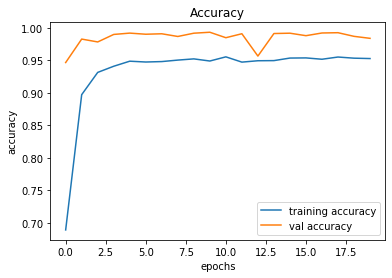

In [16]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

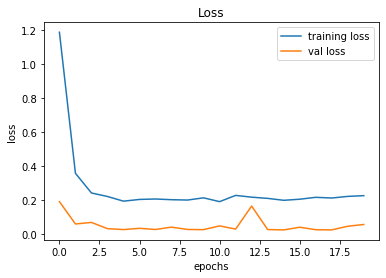

In [17]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## LEt's do testing on Test data

In [25]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [26]:
X_test, label = testing('Test.csv')

In [27]:
Y_pred = model.predict_classes(X_test)
Y_pred

array([16,  1, 38, ...,  5,  7, 10], dtype=int64)

## Accuracy with the test data

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9403008709422012


## Save the model

In [30]:
model.save("./training/TSR.h5")

## Load the Model

In [2]:
import os
os.chdir(r'D:\Traffic_Sign_Recognition')
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [3]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

In [1]:
plot,prediction = test_on_img(r'D:\Traffic_Sign_Recognition\Test\00500.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

NameError: name 'test_on_img' is not defined